<a href="https://colab.research.google.com/github/YoishD/Data-Science-B7/blob/main/Copy_of_Unit7ExercisesSF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fitting Curves: Concepts

What you'll do:

- Answer questions about what a GP is, and its relationship to GLMs and splines.
- Practice applying one of: polynomial modeling, b splines, or GPs
- You'll get a chance to read about and try to comprehend a more standard implementation of a GP.

Have fun!

**Task1**:

Why would you ever want to include a polynomial element in a model you built? What's the benefit of using polynomials to model?

Polynomials is best used when the data has a highly complicated relationship, and also keep in mind that they tend to overfit the data and have low predictive power if you are raising the degree hapazardly. A benefit of polynomials is that  helps better fit our models to our data.

**Task2**:

Why would you ever NOT want to include a polynomial element in a model you built?

Typically simliper models tend to be better as they tend to run faster on computers, help us avoid overfitting and being overconfident in our priors, and are easier to interpret. You usually only want to use a polynomial element if your data is high complicated and you can deal with the overfitted data

**Task3**:

What's the point of using b splines?

B Splines are like a more usuable version of a polynomial as it splits your graph and weights the different pieces, in order to achieve a similar flexibility, with less fitting,

**Task4**:

Describe what a Gaussian Process is, in your own words. *Don't worry about being correct, just try to explain it to yourself*. I will not grade this question for accuracy.

Gps are just Bsplines but they have a knot at every single possible X, under the assumptiont aht each and every point effects another.

**Task5**:

Refit a model to the howell data, using one of the following: polynomial model, b splines, or GPs.
Plot the posterior predictive check on a scatter plot

You only need to use one . Remember, the simpler the model is, the better (usually).

Hint: If you use a polynomial or bspline, try a disdributional model


In [2]:
!pip install git+https://github.com/pydata/xarray.git
!pip install bambi
import numpy as np
import pandas as pd
import arviz as az
import matplotlib.pyplot as plt
import xarray as xr
import bambi as bmb
howell = pd.read_csv('https://raw.githubusercontent.com/thedarredondo/data-science-fundamentals/refs/heads/main/Data/howell.csv')

  Cloning https://github.com/pydata/xarray.git to /tmp/pip-req-build-0_735wvd
  Running command git clone --filter=blob:none --quiet https://github.com/pydata/xarray.git /tmp/pip-req-build-0_735wvd
  Resolved https://github.com/pydata/xarray.git to commit 3dafcf9a29b82930828ca0bd8ff0a038b4affcd3
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for xarray: filename=xarray-2025.1.3.dev14+g3dafcf9a-py3-none-any.whl size=1250266 sha256=1ab5f057786f15753275f9d93157777eea9b9f065b64bc1f7006104b729fc829
  Stored in directory: /tmp/pip-ephem-wheel-cache-zo51cjrx/wheels/15/f9/46/ac58ec95d7761bd0b92f54d99c5d132719866f63745c3702ed
Successfully built xarray
  Attempting uninstall: xarray
    Found existing installation: xarray 2025.1.2
    Uninstalling xarray-2025.1.2:
      Successfully uninstalled xarray-2025.1.2
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.2/109.2 kB 2.8 MB/s eta 0:00:00
   ━

In [8]:
num_knots = 6
knots = np.linspace(53.975,100, num_knots+2)[1:-1] # I got my lower bound by running it first at 0, then it said and error saying it could be lower than a certain value, which I then set my new lower bound to
model_spline = bmb.Model("weight ~ bs(height, degree=3, knots=knots)", howell, family="negativebinomial")
idata_spline = model_spline.fit()

Output()

Output()

/usr/local/lib/python3.11/dist-packages/arviz/rcparams.py:368: FutureWarning: stats.hdi_prob is deprecated since 0.18.0, use stats.ci_prob instead
  warnings.warn(


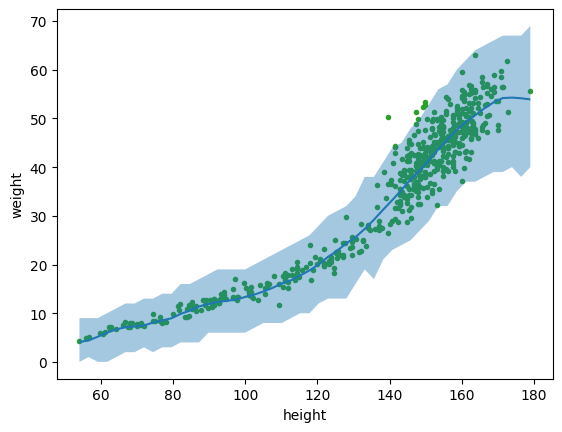

In [9]:
bmb.interpret.plot_predictions(model_spline, idata_spline, "height", pps=True)
#raw data
plt.plot(howell.height, howell.weight, "C2.", zorder=-3)

**Task6**:

Read the article on the pymc website about GP implementation on the Mauna Loa CO$_{2}$ data combined with CO$_{2}$ ice core data from the south pole.
[Link here.](https://www.pymc.io/projects/examples/en/latest/gaussian_processes/GP-MaunaLoa2.html)

Write down one thing you learned about GPs from reading the article.

Note: You probably won't understand anything in this article. The main point of this task is to hammer home that good GP implementations are extremely technical.

I learned about how you can use a covariance function to specficy changepoint behavior and you can use like a frankenstein GP, that is a combination of other GPs

**Task7**:

Describe your favorite graph from the article in the previous task. Explain why its your favorite.

My favorite graph is the one in the "Predictions" section, where it has these really uncertain start and end, and this really certain middl section. The reason why its my favorite is quite shallow as I just really enjoy the colors used (way better than our usually mustardy yellow for PPCs), and the generally shape as I find that it's really interesting in how its somehow so certain everywhere else but the start and end.